# EDA

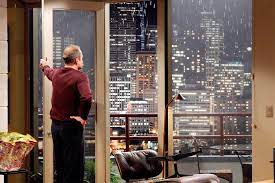

In [214]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [215]:
df = pd.read_csv("data/King_County_House_prices_dataset (3).csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [216]:
df.shape

(21597, 21)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [218]:
df.date = pd.to_datetime(df.date) 

In [219]:
df.sort_values("date").head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7316,2202500290,2014-05-02,435000.000,4,1.000,1450,8800,1.000,0.000,0.000,...,7,1450,0.0,1954,0.000,98006,47.575,-122.135,1260,8942
20586,7853361370,2014-05-02,555000.000,4,2.500,3310,6500,2.000,0.000,0.000,...,8,3310,0.0,2012,0.000,98065,47.515,-121.870,2380,5000
1040,7197300105,2014-05-02,550000.000,4,2.500,1940,10500,1.000,NaN,0.000,...,7,1140,800.0,1976,0.000,98052,47.683,-122.114,2200,10500
20543,3438501320,2014-05-02,295000.000,2,2.500,1630,1368,2.000,0.000,0.000,...,7,1280,350.0,2009,0.000,98106,47.549,-122.363,1590,2306
9587,472000620,2014-05-02,790000.000,3,2.500,2600,4750,1.000,0.000,0.000,...,9,1700,900.0,1951,0.000,98117,47.683,-122.400,2380,4750


In [220]:
df.sort_values("date").tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19381,8149600265,2015-05-14,725000.000,4,1.750,1980,5850,1.000,NaN,1.000,...,8,1380,600.0,1960,0.000,98116,47.561,-122.391,1810,5850
12623,4166600610,2015-05-14,335000.000,3,2.000,1410,44866,1.000,0.000,0.000,...,7,1410,0.0,1985,0.000,98023,47.327,-122.370,2950,29152
5632,7923600250,2015-05-15,450000.000,5,2.000,1870,7344,1.500,0.000,0.000,...,7,1870,0.0,1960,0.000,98007,47.595,-122.144,1870,7650
13040,5101400871,2015-05-24,445500.000,2,1.750,1390,6670,1.000,0.000,0.000,...,6,720,670.0,1941,0.000,98115,47.691,-122.308,920,6380
16580,9106000005,2015-05-27,1310000.000,4,2.250,3750,5000,2.000,0.000,0.000,...,8,2440,1310.0,1924,0.000,98115,47.675,-122.303,2170,4590


In [221]:
df["year_month"] = df["date"].dt.strftime("%Y-%m")

In [222]:
df.duplicated().value_counts()

False    21597
dtype: int64

In [223]:
df[df.id.duplicated(keep=False)].sort_values("id").head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_month
2495,1000102,2015-04-22,300000.000,6,3.000,2400,9373,2.000,0.000,0.000,...,2400,0.0,1991,0.000,98002,47.326,-122.214,2060,7316,2015-04
2494,1000102,2014-09-16,280000.000,6,3.000,2400,9373,2.000,NaN,0.000,...,2400,0.0,1991,0.000,98002,47.326,-122.214,2060,7316,2014-09
16800,7200179,2014-10-16,150000.000,2,1.000,840,12750,1.000,0.000,0.000,...,840,0.0,1925,0.000,98055,47.484,-122.211,1480,6969,2014-10
16801,7200179,2015-04-24,175000.000,2,1.000,840,12750,1.000,0.000,0.000,...,840,0.0,1925,NaN,98055,47.484,-122.211,1480,6969,2015-04
11422,109200390,2014-10-20,250000.000,3,1.750,1480,3900,1.000,0.000,0.000,...,1480,0.0,1980,0.000,98023,47.298,-122.367,1830,6956,2014-10
11421,109200390,2014-08-20,245000.000,3,1.750,1480,3900,1.000,0.000,0.000,...,1480,0.0,1980,0.000,98023,47.298,-122.367,1830,6956,2014-08
12406,123039336,2014-12-08,244900.000,1,1.000,620,8261,1.000,0.000,0.000,...,620,0.0,1939,NaN,98106,47.514,-122.364,1180,8244,2014-12
12405,123039336,2014-06-11,148000.000,1,1.000,620,8261,1.000,0.000,0.000,...,620,0.0,1939,0.000,98106,47.514,-122.364,1180,8244,2014-06


houses just got sold multiple times -> keep

In [224]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year_month          0
dtype: int64

<AxesSubplot: >

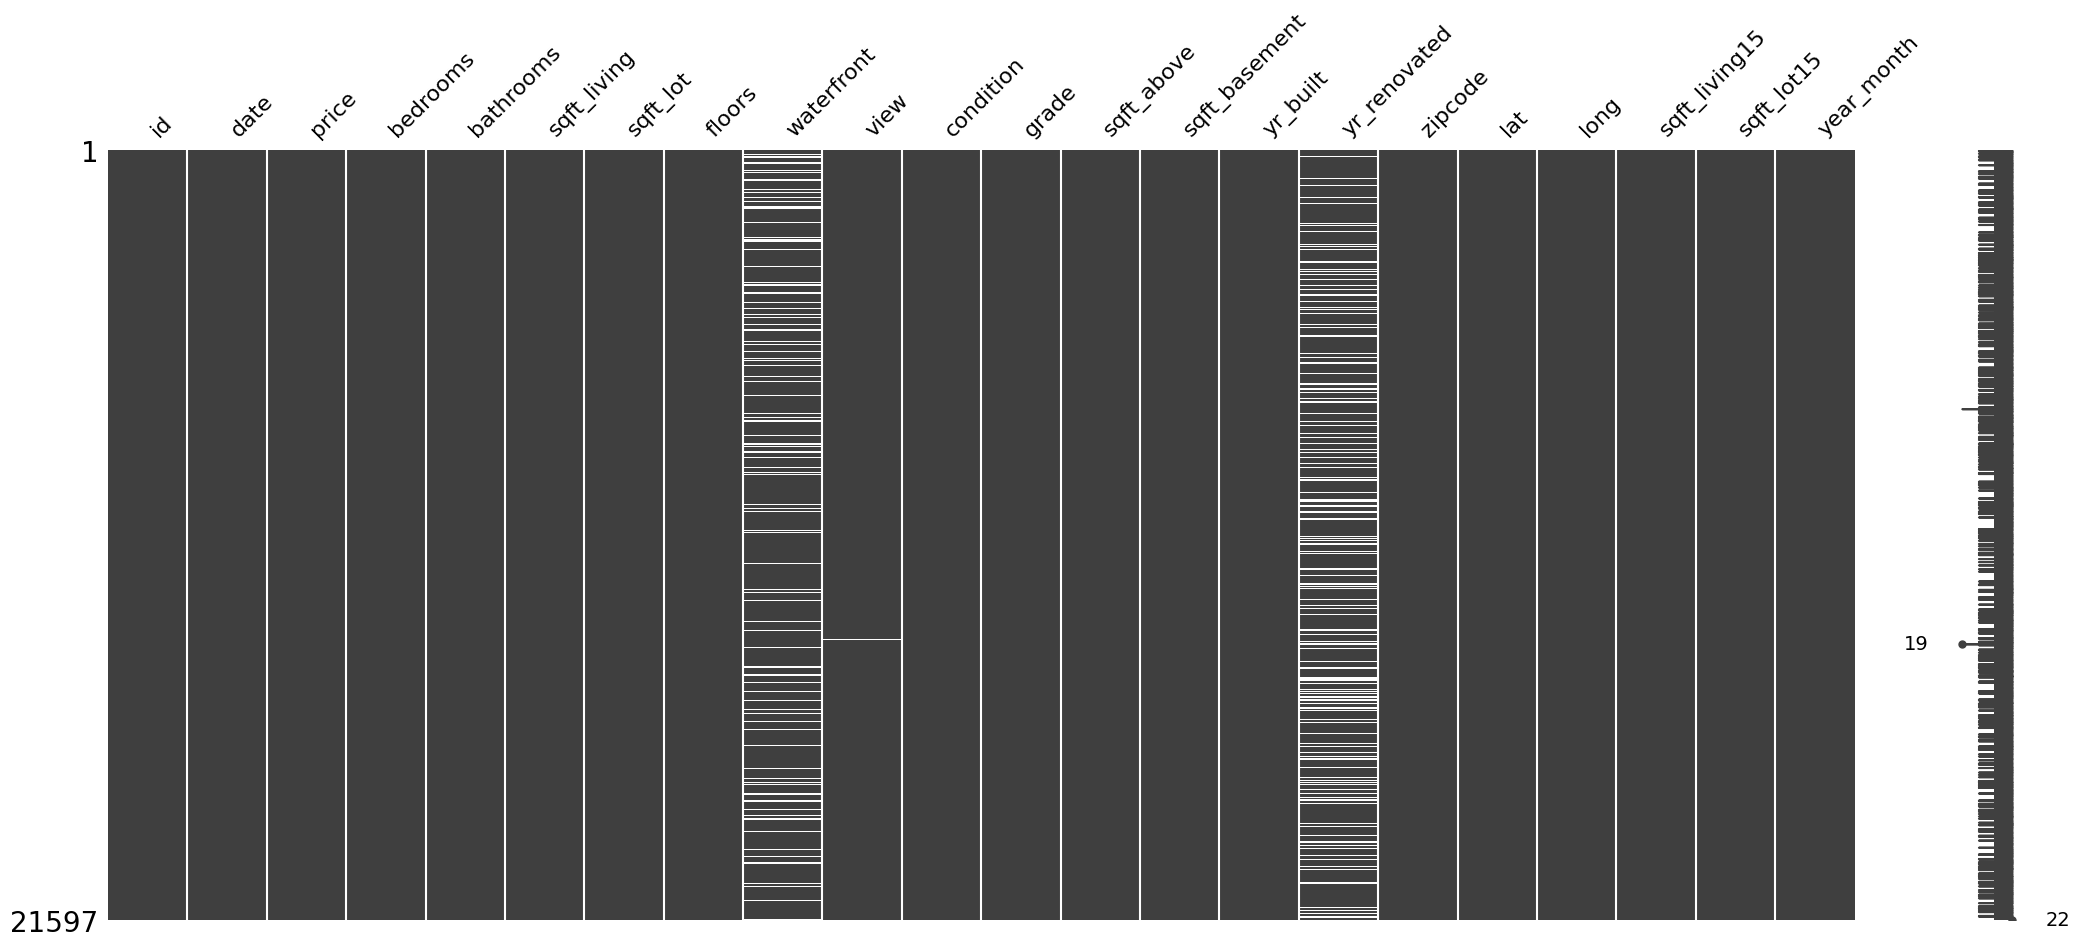

In [225]:
msno.matrix(df)

In [226]:
df[df.yr_renovated.isna()].head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_month
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,2015-02
12,114101516,2014-05-28,310000.000,3,1.000,1430,19901,1.500,0.000,0.000,...,1430,0.0,1927,NaN,98028,47.756,-122.229,1780,12697,2014-05
23,8091400200,2014-05-16,252700.000,2,1.500,1070,9643,1.000,NaN,0.000,...,1070,0.0,1985,NaN,98030,47.353,-122.166,1220,8386,2014-05
26,1794500383,2014-06-26,937000.000,3,1.750,2450,2691,2.000,0.000,0.000,...,1750,700.0,1915,NaN,98119,47.639,-122.360,1760,3573,2014-06
28,5101402488,2014-06-24,438000.000,3,1.750,1520,6380,1.000,0.000,0.000,...,790,730.0,1948,NaN,98115,47.695,-122.304,1520,6235,2014-06
40,5547700270,2014-07-15,625000.000,4,2.500,2570,5520,2.000,NaN,0.000,...,2570,0.0,2000,NaN,98074,47.614,-122.027,2470,5669,2014-07
45,8035350320,2014-07-18,488000.000,3,2.500,3160,13603,2.000,0.000,0.000,...,3160,0.0,2003,NaN,98019,47.744,-121.977,3050,9232,2014-07
52,7518505990,2014-12-31,600000.000,3,1.750,1410,4080,1.000,0.000,0.000,...,1000,410.0,1950,NaN,98117,47.681,-122.384,1410,4080,2014-12
56,9478500640,2014-08-19,292500.000,4,2.500,2250,4495,2.000,0.000,0.000,...,2250,0.0,2008,NaN,98042,47.366,-122.114,2250,4500,2014-08
58,7922800400,2014-08-27,951000.000,5,3.250,3250,14342,2.000,0.000,4.000,...,3250,0.0,1968,NaN,98008,47.588,-122.116,2960,11044,2014-08


In [227]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [228]:
df.zipcode.nunique()

70

In [229]:
density = pd.read_csv("data/Zipcode-ZCTA-Population-Density-And-Area-Unsorted.csv")
density.head()

,Zip/ZCTA,2010 Population,Land-Sq-Mi,Density Per Sq Mile
0,601,0,64.348,0.000
1,602,0,30.613,0.000
2,603,0,31.616,0.000
3,606,0,42.309,0.000
4,610,0,35.916,0.000


Zip and ZCTA are not quite the same!

In [230]:
density_kc = density[density["Zip/ZCTA"].isin(df.zipcode)]
density_kc.head()

,Zip/ZCTA,2010 Population,Land-Sq-Mi,Density Per Sq Mile
32308,98001,31911,18.595,1716.106
32309,98002,31647,7.148,4427.392
32310,98003,44151,11.614,3801.533
32311,98004,27946,7.069,3953.317
32312,98005,17714,7.498,2362.497


In [231]:
density_kc.shape

(70, 4)

6000 threshold sanity check

In [232]:
density_kc.sort_values("Density Per Sq Mile", ascending=False, inplace=True)
density_kc.reset_index(inplace=True, drop=True)
density_kc.head(20)

,Zip/ZCTA,2010 Population,Land-Sq-Mi,Density Per Sq Mile
0,98102,20756,1.287,16127.428
1,98122,31454,2.314,13592.913
2,98105,43924,4.124,10650.824
3,98109,20715,1.999,10362.681
4,98103,45911,4.635,9905.286
5,98107,21147,2.192,9647.354
6,98119,21039,2.437,8633.156
7,98117,31365,3.854,8138.298
8,98144,26881,3.405,7894.567
9,98116,22241,2.956,7524.019


In [233]:
density_kc.set_index("Zip/ZCTA", inplace=True)
density_kc.drop(["2010 Population", "Land-Sq-Mi"], axis=1, inplace=True)
density_kc.head()

,Density Per Sq Mile
Zip/ZCTA,
98102,16127.428
98122,13592.913
98105,10650.824
98109,10362.681
98103,9905.286


In [234]:
 df = df.join(density_kc, on="zipcode")
 df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_month,Density Per Sq Mile
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,2014-10,4970.497
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,2014-12,6879.592
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,2015-02,3612.703
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,2014-12,6424.532
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,2015-02,2410.861


In [235]:
df.shape

(21597, 23)

In [236]:
df.rename({"Density Per Sq Mile": "density"}, axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_month,density
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,2014-10,4970.497
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,2014-12,6879.592
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,2015-02,3612.703
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,2014-12,6424.532
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,2015-02,2410.861


In [237]:
central = df[df.density >= 6000]
outskirts = df[df.density < 6000]

In [238]:
central.shape

(5888, 23)

In [239]:
outskirts.shape

(15709, 23)

In [240]:
central.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,density
count,5888.000,5888.000,5888.000,5888.000,5888.000,5888.000,5888.000,5244.000,5869.000,5888.000,5888.000,5888.000,5888.000,4822.000,5888.000,5888.000,5888.000,5888.000,5888.000,5888.000
mean,4754154380.203,595727.368,3.139,1.928,1792.373,5036.551,1.560,0.004,0.271,3.463,7.431,1438.141,1952.503,134.179,98119.007,47.641,-122.334,1673.624,4915.915,8208.031
std,2902373308.680,345829.494,1.080,0.795,791.961,3335.769,0.631,0.063,0.805,0.718,0.979,600.894,35.410,500.015,11.121,0.065,0.040,486.897,2405.560,2097.371
min,3600057.000,109000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,4.000,370.000,1900.000,0.000,98102.000,47.512,-122.415,460.000,659.000,6279.774
25%,2391601428.750,400000.000,2.000,1.000,1250.000,3144.000,1.000,0.000,0.000,3.000,7.000,1020.000,1924.000,0.000,98112.000,47.580,-122.371,1360.000,3703.750,6838.054
50%,4206901470.000,515000.000,3.000,1.750,1620.000,4800.000,1.500,0.000,0.000,3.000,7.000,1300.000,1947.000,0.000,98117.000,47.660,-122.336,1570.000,4901.000,7524.019
75%,7324525495.000,680000.000,4.000,2.500,2180.000,6348.500,2.000,0.000,0.000,4.000,8.000,1680.000,1986.000,0.000,98125.000,47.690,-122.298,1870.000,6200.000,9647.354
max,9842300540.000,7700000.000,33.000,8.000,12050.000,91681.000,3.500,1.000,4.000,5.000,13.000,8570.000,2015.000,2015.000,98144.000,47.778,-122.249,4950.000,34713.000,16127.428


top 10 % of what? let's say price

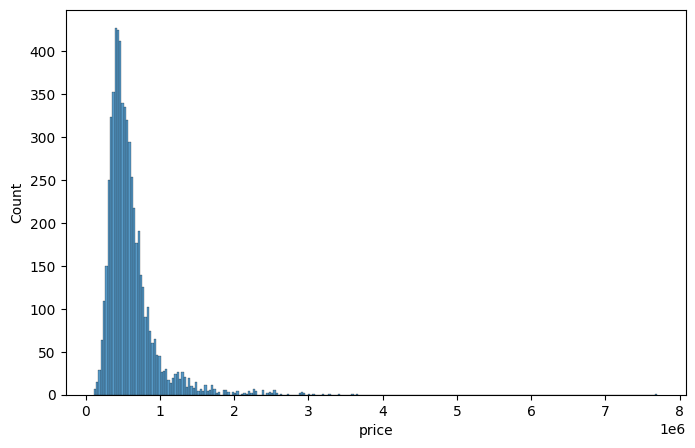

In [241]:
sns.histplot(data=central, x="price")
plt.show()

In [242]:
central.price.quantile(0.9)

921150.0000000001

In [243]:
top_central = central[central.price >= central.price.quantile(0.9)]

In [244]:
top_central.shape

(589, 23)

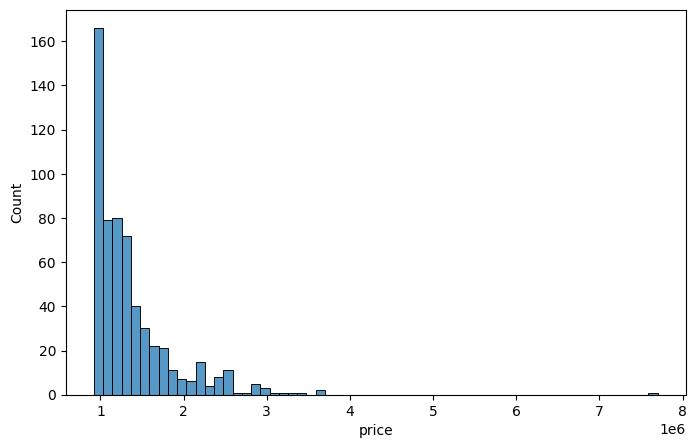

In [245]:
sns.histplot(data=top_central, x="price")
plt.show()

In [246]:
top_central = top_central[top_central.price < 7000000]

In [247]:
tc_by_ym = top_central.groupby(["year_month"]).median().reset_index()
tc_by_ym.head()

,year_month,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,density
0,2014-05,4217401180.000,1280000.000,4.000,2.750,2920.000,6480.000,2.000,0.000,0.000,...,9.000,2190.000,1932.000,0.000,98112.000,47.641,-122.303,2480.000,5800.000,8138.298
1,2014-06,3362650083.000,1225000.000,4.000,3.000,2980.000,5085.500,2.000,0.000,0.000,...,9.000,2360.000,1926.500,0.000,98113.500,47.632,-122.322,2420.000,5275.000,8138.298
2,2014-07,4141800285.000,1300000.000,4.000,2.750,3170.000,5500.000,2.000,0.000,0.000,...,9.000,2370.000,1931.000,0.000,98112.000,47.635,-122.301,2550.000,5183.000,7894.567
3,2014-08,4700350852.500,1095000.000,4.000,3.000,3145.000,5139.500,2.000,0.000,0.000,...,9.000,2370.000,1951.000,0.000,98115.000,47.640,-122.311,2350.000,5169.500,7013.661
4,2014-09,5244801550.000,1200000.000,4.000,3.000,3030.000,5335.000,2.000,0.000,0.000,...,9.000,2400.000,1930.000,0.000,98115.000,47.631,-122.303,2320.000,5000.000,8138.298


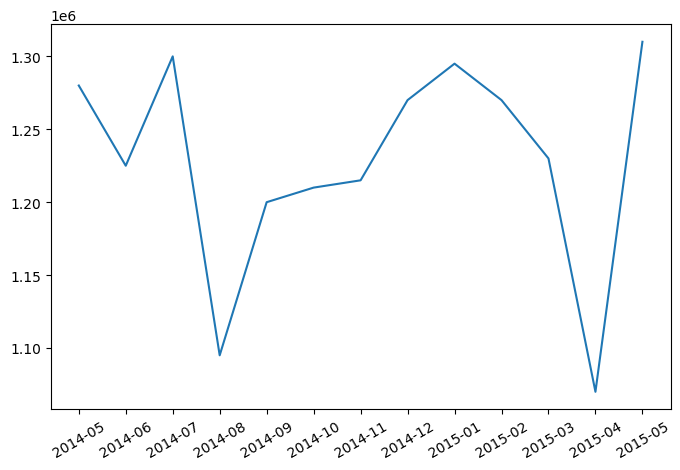

In [262]:
# months= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fig, ax = plt.subplots()
ax.plot(tc_by_ym.year_month, tc_by_ym.price)
plt.xticks(rotation=30)
plt.show()

In [249]:
top_central.groupby(["year_month"]).count().reset_index()

,year_month,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,density
0,2014-05,53,53,53,53,53,53,53,53,52,...,53,53,53,44,53,53,53,53,53,53
1,2014-06,60,60,60,60,60,60,60,60,52,...,60,60,60,50,60,60,60,60,60,60
2,2014-07,65,65,65,65,65,65,65,65,62,...,65,65,65,47,65,65,65,65,65,65
3,2014-08,44,44,44,44,44,44,44,44,39,...,44,44,44,34,44,44,44,44,44,44
4,2014-09,45,45,45,45,45,45,45,45,39,...,45,45,45,37,45,45,45,45,45,45
5,2014-10,49,49,49,49,49,49,49,49,44,...,49,49,49,45,49,49,49,49,49,49
6,2014-11,42,42,42,42,42,42,42,42,38,...,42,42,42,34,42,42,42,42,42,42
7,2014-12,42,42,42,42,42,42,42,42,39,...,42,42,42,33,42,42,42,42,42,42
8,2015-01,26,26,26,26,26,26,26,26,24,...,26,26,26,23,26,26,26,26,26,26
9,2015-02,23,23,23,23,23,23,23,23,21,...,23,23,23,17,23,23,23,23,23,23


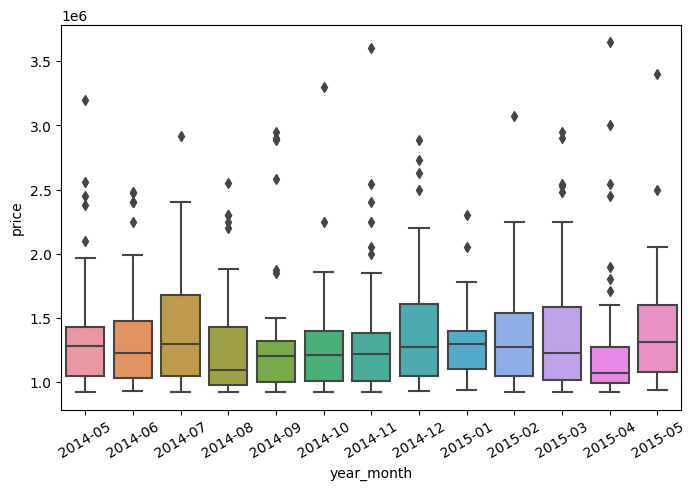

In [269]:
ax = sns.boxplot(data=top_central.sort_values("year_month"), x="year_month", y="price")
plt.xticks(rotation=30)
plt.show()

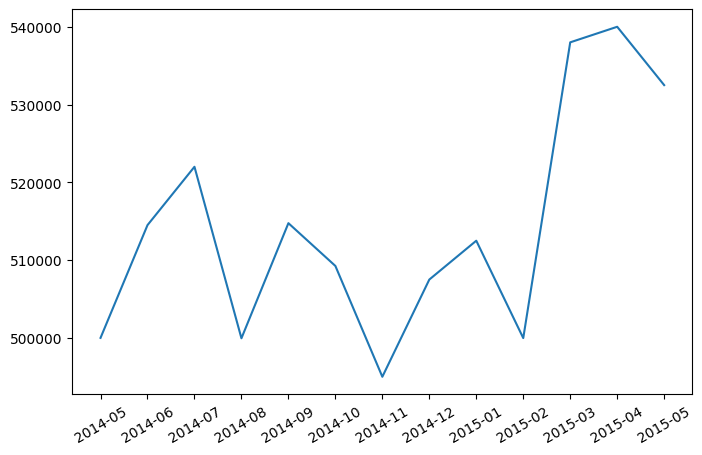

In [261]:
c_by_ym = central.groupby(["year_month"]).median().reset_index()
fig, ax = plt.subplots()
ax.plot(c_by_ym.year_month, c_by_ym.price)
plt.xticks(rotation=30)
plt.show()

In [ ]:
outskirts.describe()